In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('expand_frame_repr', False) 
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 120)

In [2]:
test_data = pd.read_csv('cs-test.csv',index_col=['Unnamed: 0'])
X_test = test_data.iloc[:, 1:]
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101499,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [3]:
test_data_y = pd.read_csv('sampleEntry.csv',index_col=['Id'])

# To create a new column 'Predict' based on the values in column 'Probability', 
# where values greater than or equal to 0.5 are assigned 1 and values less than 0.5 are assigned 0
test_data_y['Predict'] = test_data_y['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

y_test = test_data_y['Predict'] 
y_test

Id
1         0
2         0
3         0
4         0
5         0
         ..
101499    0
101500    0
101501    0
101502    0
101503    0
Name: Predict, Length: 101503, dtype: int64

In [4]:
training_data = pd.read_csv('cs-training.csv',index_col=['Unnamed: 0'])
X_train = training_data.iloc[:, 1:]
y_train = training_data.iloc[:, 0]
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Fill-in the missing values with the column means

In [5]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Select the 3 most important features using PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29948872, 0.1533157 , 0.12254696, 0.10092078, 0.10010863,
       0.09344974, 0.073465  , 0.05430268, 0.00172094, 0.00068085])

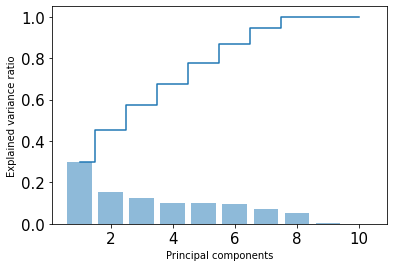

In [8]:
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.984


## Implement Random Forest using pipeline and the selected features from above

### Tuning hyperparameters via grid search 

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        RandomForestClassifier(random_state=1))

parameters = {'max_depth': [5, 7], 'min_samples_split':[13, 15]}

grid_search = GridSearchCV(model, parameters, cv=5)

grid_search = grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 13}